# Part b4 -- Plotting Transformed Features

Plotting SVD and t-SNE to see relationships in our data and identify features with the most variance.

**Load lib codes**

In [1]:
from os import chdir
chdir('/home/jovyan/work/Analyzing_Unstructured_Data_for_Finance/Analyzing_Unstructured_Data_for_Finance/')

from lib import *
# suppress_warnings()
%matplotlib inline

In [24]:
X_tfidf = joblib.load('../Analyzing_Unstructured_Data_for_Finance/data_cleaned/b2.X_tfidf.pickle')

In [25]:
y_le = joblib.load('../Analyzing_Unstructured_Data_for_Finance/data/5.y_le.pickle')

In [31]:
from sklearn.decomposition import PCA

**PCA**

In [5]:
PCA = PCA(n_components = 50, random_state=42)
PCA_tfidf = PCA.fit_transform(X_tfidf.todense())

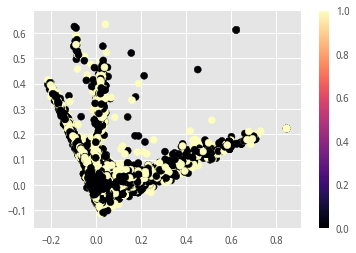

In [6]:
plt.scatter(PCA_tfidf.T[0], PCA_tfidf.T[1], c=y_le, cmap='magma')
plt.colorbar()

In [32]:
pca = PCA(n_components = 300, random_state=42)
pca_tfidf = pca.fit_transform(X_tfidf.todense())

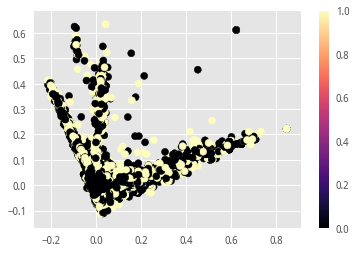

In [33]:
plt.scatter(pca_tfidf.T[0], pca_tfidf.T[1], c=y_le, cmap='magma')
plt.colorbar()

**SVD**

In [19]:
from sklearn.decomposition import TruncatedSVD

In [20]:
svd = TruncatedSVD(n_components=300, random_state=42)

In [27]:
svd_tfidf = svd.fit_transform(X_tfidf.todense())

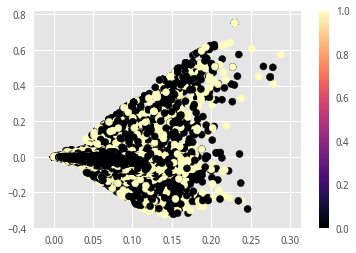

In [28]:
plt.scatter(svd_tfidf.T[0], svd_tfidf.T[1], c=y_le, cmap='magma')
plt.colorbar()

In [41]:
joblib.dump(svd_tfidf, '../Analyzing_Unstructured_Data_for_Finance/data_cleaned/b4.SVD_tfidf.pickle')

['../Analyzing_Unstructured_Data_for_Finance/data_cleaned/b4.SVD_tfidf.pickle']

**t-SNE**<br>
To visualize the word embedding in two dimensions, we need to choose a dimensionality reduction technique to use. t-SNE optimizes for keeping points close to their neighbors, so it is the natural tool if we want to visualize which words are close together in our word embedding.

In [ ]:
!pip install bhtsne

In [36]:
import bhtsne
from bhtsne import tsne

In [38]:
start = datetime.now()

TSNE_SVD_tfidf = tsne(svd_tfidf)

end = datetime.now()
print(end - start)

1:00:42.100543


In [40]:
joblib.dump(TSNE_SVD_tfidf, '../Analyzing_Unstructured_Data_for_Finance/data_cleaned/b4.TSNE_SVD_tfidf.pickle')

['../Analyzing_Unstructured_Data_for_Finance/data_cleaned/b4.TSNE_SVD_tfidf.pickle']

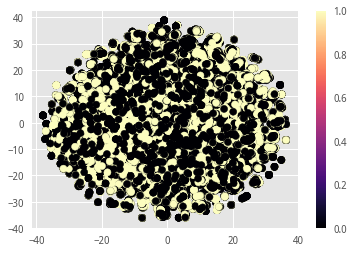

In [42]:
plt.scatter(TSNE_SVD_tfidf.T[0], TSNE_SVD_tfidf.T[1], c=y_le, cmap='magma')
plt.colorbar()